In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('summary.csv')

In [4]:
info_keys = [ 
    'unroll',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

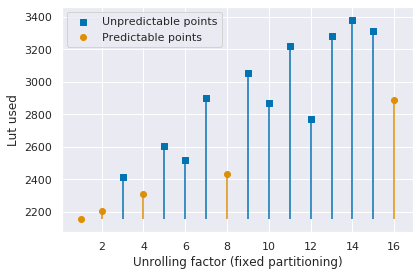

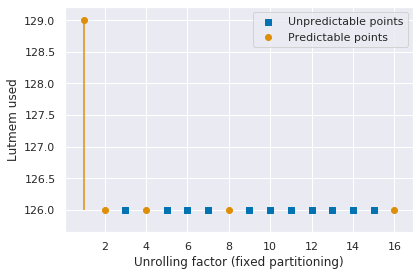

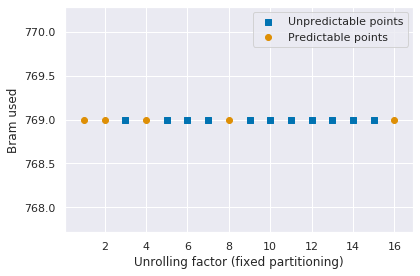

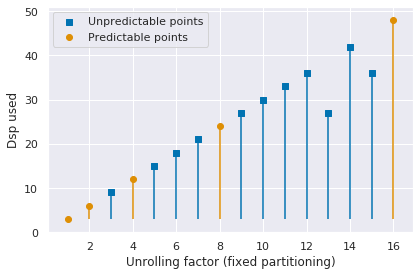

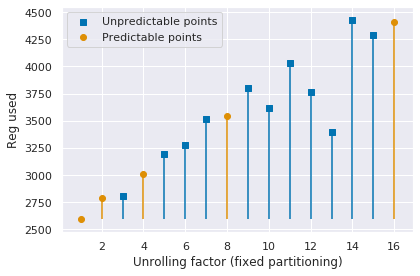

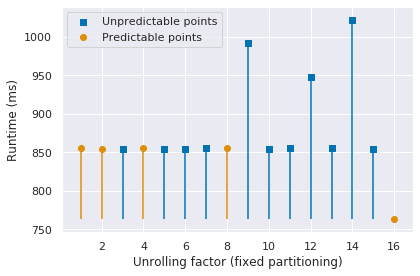

In [7]:
import math
sns.set()

df = df[df.unroll < 32]

pal = sns.color_palette('colorblind', 8).as_hex()

for key in keys:
    fig = plt.figure()

    ymin = df[key].min()
    
    normal = df[128 % df.unroll != 0]
    dahlia = df[128 % df.unroll == 0]
    
    # Normal points
    plt.vlines(x='unroll', ymax=key, data=normal, ymin=ymin, color=pal[0])
    plt.scatter(x='unroll', y=key, data=normal, color=pal[0], marker='s', label='Unpredictable points')
    
    # Predictable points
    plt.vlines(x='unroll', ymax=key, data=dahlia, ymin=ymin, color=pal[1])
    plt.scatter(x='unroll', y=key, data=dahlia, color=pal[1], marker='o', label='Predictable points')
    
    if key == 'runtime_avg':
        label = 'Runtime (ms)'
    else:
        label = key.replace('_', ' ').capitalize()
    plt.ylabel(label)
    plt.xlabel('Unrolling factor (fixed partitioning)')
    plt.legend()
    
    fig.tight_layout()
    fig.savefig('absolute-{}.png'.format(key), dpi=200)